load_image.py

### 1. image 시각화

In [6]:
import os
import sys
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

True
c:\Users\shiney\Documents\GitHub\dataset\computer_vision\PASCAL_VOC


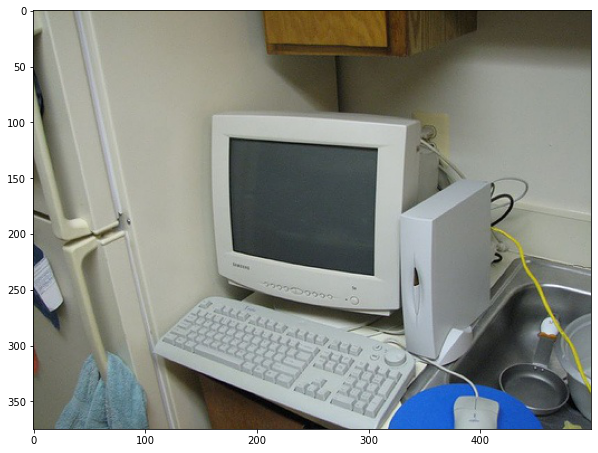

In [16]:
image_path  = "./VOCdevkit/VOC2012/JPEGImages/2007_000039.jpg"
print(os.path.isfile(image_path))
print(os.getcwd())

image = Image.open(image_path).convert("RGB")

plt.figure(figsize = (10, 20))
plt.imshow(image)
plt.show()
plt.close()

### 2. xml 파일 시작화
#### xml parsing

In [18]:
import xml.etree.ElementTree as Et
from xml.etree.ElementTree import Element, ElementTree

xml_path = "./VOCdevkit/VOC2012/Annotations/2007_000039.xml"
print(os.path.isfile(xml_path))

True


In [21]:
xml = open(xml_path, 'r')
tree = Et.parse(xml)
root = tree.getroot()
print(root)

<Element 'annotation' at 0x000001D68297AB80>


In [22]:
size = root.find("size")
width = size.find('width').text
height = size.find('height').text
channels = size.find('depth').text
print(width, height, channels)

500 375 3


In [24]:
objects = root.findall('object')
for i,  _object in enumerate(objects):
    name = _object.find('name').text
    bndbox = _object.find('bndbox')
    xmin = bndbox.find('xmin').text
    ymin = bndbox.find('ymin').text
    xmax = bndbox.find('xmax').text
    ymax = bndbox.find('ymax').text
    print(i, name, xmin, ymin, xmax, ymax)

print('XML pasing ENd')

0 tvmonitor 156 89 344 279
XML pasing ENd


#### xml 시각화

image_path ./VOCdevkit/VOC2012\JPEGImages
ann_path ./VOCdevkit/VOC2012\Annotations
# root : ./VOCdevkit/VOC2012\Annotations


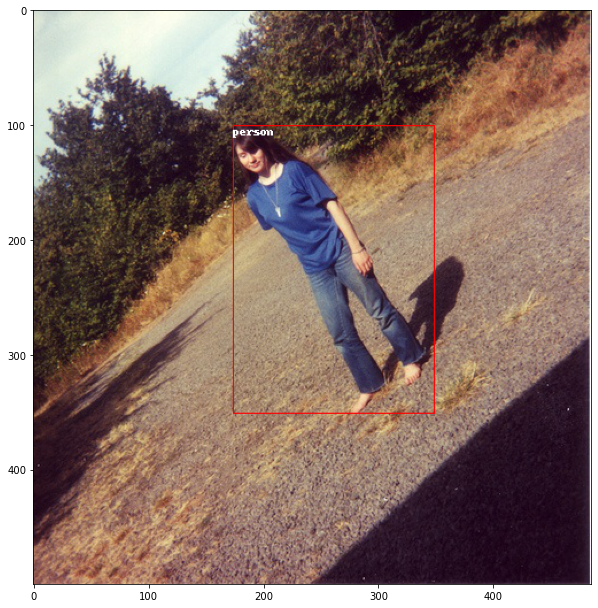

In [47]:
dataset_path = "./VOCdevkit/VOC2012"

IMAGE_FOLDER = 'JPEGImages'
ANNOTATINS_FOLDER = 'Annotations'

image_path = os.path.join(dataset_path, IMAGE_FOLDER)
ann_path = os.path.join(dataset_path, ANNOTATINS_FOLDER)

print('image_path', image_path)
print('ann_path', ann_path)

for (root, dirs, files) in os.walk(ann_path):
    print("# root : " + root)
    if len(files) > 0:
        for xml_file in files:
            image_name = xml_file.split('.')[0] + '.jpg'
            image_path = os.path.join(image_path, image_name).replace("\\", "/")

            image = Image.open(image_path).convert('RGB')
            draw = ImageDraw.Draw(image)

            xml = open(os.path.join(root, xml_file), 'r')
            tree = Et.parse(xml)
            root = tree.getroot()

            size = root.find("size")

            width = size.find("width").text
            height = size.find("height").text
            channels = size.find("depth").text

            objects = root.findall("object")
            for _object in objects:
                name = _object.find("name").text
                bndbox = _object.find("bndbox")
                xmin = int(bndbox.find("xmin").text)
                ymin = int(bndbox.find("ymin").text)
                xmax = int(bndbox.find("xmax").text)
                ymax = int(bndbox.find("ymax").text)

                # Box를 그릴 때, 왼쪽 상단 점과, 오른쪽 하단 점의 좌표를 입력으로 주면 됩니다.
                draw.rectangle(((xmin, ymin), (xmax, ymax)), outline="red")
                draw.text((xmin, ymin), name)

            plt.figure(figsize=(10,30))
            plt.imshow(image)
            plt.show()
            plt.close()

            break


